<a href="https://colab.research.google.com/github/codeboy47/Netflix-movies-and-tv-shows-clustering/blob/main/Netflix_movies_and_tv_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Akshit Singh


# **Project Summary -**
I decided to work on the Netflix Movies and TV Shows Clustering capstone project as
it is the world’s largest on-demand internet streaming media and online DVD movie
rental service provider. It has 69 million members in over 60 countries enjoying more
than 100 million hours of TV shows and movies daily. Netflix is the world’s leading
internet entertainment service enjoying TV series, documentaries, and feature films
across a wide variety of genres and languages. I find it a great opportunity to work on
the such dataset to find useful insights and share my interesting findings through
this project.
After studying the Netflix dataset I observed there were around 7,787 observations with 12
columns. The date_added and show_id columns do not give any meaningful insights
for our analysis. I didn't remove the rows containing null values of the present in
director, cast, country, date_added and rating columns because the clustering is done
on the basis of the text present in the theses column plus I didn't want to lose the
important information present in the dataset as that might hamper the performance
of the model.
I worked on various aspects like
- Understanding the features through visualization: I have shown the
representation of the frequency of movies and TV shows for different years through
point plot and deduced that in recent years, Netflix has increasingly focused on TV
shows rather than movies. I also found out the type of content available in different
countries through grouped bar graphs. With the help of a column chart, I have shown
the top actors and directors that worked in the maximum number of movies and TV
shows. I used a pie plot to find which rating has the most number of movies/tv shows
on Netflix. I have also created a word cloud using the listed_in column to visualize the
most frequent movies and TV show genres.
- Data preprocessing: Data preprocessing is an important step where the words that
are insignificant for the machine learning model are removed such as punctuation,
special characters, stopwords etc. The objective is to remove words that carry less
weight in context to the text. I have done it in 3 steps. First I removed punctuation
marks. In the second step, I removed stopwords. In the last step, stemming was
applied to the text. For stemming, I used SnowballStemmer.
- Models: For model training, I used TF-IDF vectorization to reflect how important a
word is to a document in a collection or corpus and then implemented K-Means and
Hierarchical clustering algorithms. I also used principal component analysis(PCA) to
reduce the dimensionality of the data. Plotted dendrogram to find the number of
clusters for Hierarchical clustering. I implemented the K-Means clustering algorithm
to form clusters for various movies. To evaluate the model used elbow method and
Silhouette score as it is used to evaluate the quality of clusters created using
clustering algorithms in terms of how well samples are clustered with other samples
that are similar to each other. I used word cloud to give names to these clusters that
were formed.

# **GitHub Link -**

https://github.com/codeboy47/Netflix-movies-and-tv-shows-clustering

# **Problem Statement**


**The dataset consists of TV shows and movies available on Netflix. In 2018, they
released an interesting report which shows that the number of TV shows on Netflix
has nearly tripled since 2010. It will be interesting to explore what all other insights
can be obtained from the dataset. The given challenge is to cluster similar content
by matching text-based features.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import package
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# Import Sklearn Libraries
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [ ]:
## Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Dataset Loading

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/Netflix Movies and TV Shows Clustering - Akshit Singh/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(file_path, index_col = False)

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Shape of the Dataset:", netflix_df.shape)

Shape of the Dataset: (7787, 12)


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
value = len(netflix_df[netflix_df.duplicated()])
print("Total no. of duplicates = ", value)

Total no. of duplicates =  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
count_of_null_values = netflix_df.isnull().sum()
count_of_null_values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

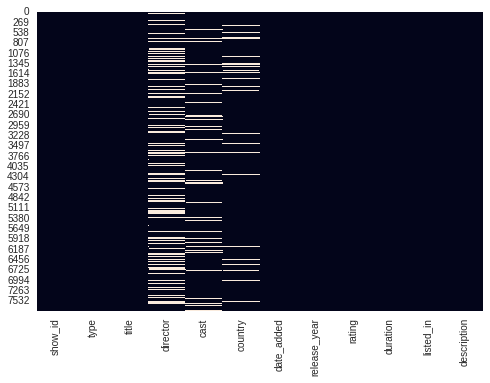

In [ ]:
# Visualizing the missing values
sns.heatmap(netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

After studying the Netflix dataset I observed there were around 7,787 observations with 12 columns. The dataset mostly contains categorical data. The date_added and show_id columns do not give any meaningful insights for our analysis. I didn't remove the rows containing null values of the present in director, cast, country, date_added and rating columns because the clustering is done on the basis of the text present in the theses column plus I didn't want to lose the important information present in the dataset as that might hamper the performance of the model.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Releaseyear of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genere

* description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in netflix_df.columns.tolist():
    print("No. of unique values for", column, "is", netflix_df[column].nunique())

No. of unique values for show_id is 7787
No. of unique values for type is 2
No. of unique values for title is 7787
No. of unique values for director is 4049
No. of unique values for cast is 6831
No. of unique values for country is 681
No. of unique values for date_added is 1565
No. of unique values for release_year is 73
No. of unique values for rating is 14
No. of unique values for duration is 216
No. of unique values for listed_in is 492
No. of unique values for description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

In [ ]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
# Getting top 10 director-wise count of movie/shows
year_count = netflix_df.groupby(['director'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'frequency'})[0:10]
year_count

,director,frequency
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
1604,Jay Chapman,12
4007,Youssef Chahine,12
3599,Steven Spielberg,10
875,David Dhawan,9
3262,Ryan Polito,8


In [ ]:
# Creating Movie dataframe for duration
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie']
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.replace(' min','')
netflix_movies_df['duration'] = netflix_movies_df['duration'].astype(str).astype(int)
netflix_movies_df['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [ ]:
# Creating TV show dataframe for duration
netflix_tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show']
netflix_tv_shows_df['duration'] = netflix_tv_shows_df['duration'].str.replace(' Season','')
netflix_tv_shows_df['duration'] = netflix_tv_shows_df['duration'].str.replace(' Seasons','')
netflix_tv_shows_df['duration'] = netflix_tv_shows_df['duration'].str.replace('s','')
netflix_tv_shows_df['duration'] = netflix_tv_shows_df['duration'].astype(str).astype(int)
netflix_tv_shows_df['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

In [ ]:
# converting genre to dict
def convert_to_dict(df):
  try:
    genre_count = {}
    genre_count_final = []
    genre_list = list(df['listed_in'])
    for each in range(len(genre_list)):
      genre_count_final.extend(genre_list[each].split(", "))
    for each in genre_count_final:
      if each not in genre_count:
        genre_count[each] = genre_count_final.count(each)
    return genre_count
  except:
    return genre_count

In [ ]:
# calling function
genre_dict = convert_to_dict(netflix_df)

In [ ]:
# creating the genre df
genre_df = pd.DataFrame(list(genre_dict.items()), columns = ['Genres', 'Count']).sort_values('Count', ascending = False)

In [ ]:
# Function to create dictionary that contains actors as key and count of movies as value
def fetching_actor_names(list_of_actors):

  # initializing empty dictionary and list of actors
  actors_dict = {}
  actor_list = []

  # creating list of actors
  for actors_string in list_of_actors:
    # pushing each actor name into a list
    actor_list.extend(str(actors_string).split(', '))

  # iterating the list of actors
  for actor in actor_list:
      # checking if actor is present in a list
      if actor in actors_dict.keys():
        actors_dict[actor] += 1
      # if actor is not present set the value as 1
      else:
        actors_dict[actor] = 1
  
  # popping the null value
  actors_dict.pop('nan')
  #returning the dictionary
  return actors_dict
  
actors_dict = fetching_actor_names(list(netflix_df['cast']))

In [ ]:
# converting dictionary of actors into a dataframe
actor_df = pd.DataFrame(list(actors_dict.items()), columns = ['actor_name', 'movie_count'])

In [ ]:
# fetching top 10 actors that acted in most number of movies
actors_top_10 = actor_df.sort_values('movie_count', ascending = False)[:10]
actors_top_10

,actor_name,movie_count
1290,Anupam Kher,42
3987,Shah Rukh Khan,35
714,Naseeruddin Shah,30
2191,Om Puri,30
2189,Akshay Kumar,29
193,Takahiro Sakurai,29
1996,Amitabh Bachchan,27
2488,Paresh Rawal,27
4099,Yuki Kaji,27
737,Boman Irani,27


In [ ]:
# Rating-wise count of movie/shows
rating_count = netflix_df.groupby(['rating'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'frequency'})[:10]
rating_count

,rating,frequency
8,TV-MA,2863
6,TV-14,1931
9,TV-PG,806
5,R,665
4,PG-13,386
10,TV-Y,280
11,TV-Y7,271
3,PG,247
7,TV-G,194
2,NR,84


In [ ]:
# Getting year-wise count of movies
movie_df = netflix_df[netflix_df['type'] == 'Movie']
movie_count_per_year = movie_df.groupby(['release_year'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'movies'})

In [ ]:
# Getting year-wise count of tv shows
tv_show_df = netflix_df[netflix_df['type'] == 'TV Show']
tv_show_count_per_year = tv_show_df.groupby(['release_year'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'tv_shows'})

In [ ]:
# merging dataframes by inner join
inner_df = pd.merge(movie_count_per_year, tv_show_count_per_year, how = 'inner', on = 'release_year')[:10]
inner_df

,release_year,movies,tv_shows
0,2017,744,268
1,2018,734,387
2,2016,642,240
3,2019,582,414
4,2020,411,457
5,2015,382,159
6,2014,244,90
7,2013,202,65
8,2012,158,61
9,2010,136,37


In [ ]:
# convert to long (tidy) form
dfm = inner_df.melt('release_year', var_name = 'count', value_name = 'vals')

In [ ]:
# Getting country-wise count of movies
movies_location_count = movie_df.groupby(['country'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'movies'})

In [ ]:
# Getting country-wise count of tv shows
tv_shows_location_count = tv_show_df.groupby(['country'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'tv_shows'})

In [ ]:
# merging dataframes using inner join to get top 10 countries with most number of movies and tv shows
inner_df = pd.merge(movies_location_count, tv_shows_location_count, how = 'inner', on = 'country')[:10]
inner_df

,country,movies,tv_shows
0,United States,1850,705
1,India,852,71
2,United Kingdom,193,204
3,Canada,118,59
4,Spain,89,45
5,Egypt,89,12
6,Turkey,73,27
7,Philippines,70,1
8,France,69,46
9,Japan,69,157


In [ ]:
# convert to long (tidy) form
dfm = inner_df.melt('country', var_name = 'type', value_name = 'vals')

In [ ]:
# Function for plotting varoius graphs using sns
def create_sns_plot(plot_name, x_name, y_name, data_name, palette_color, title, xlabel, ylabel, hue_name = None):
    # setting the size of graphs
    fig, ax = plt.subplots(figsize = (20, 8))
    # creating plot by assigning values to the sns parameters
    plot_name(x = x_name, y = y_name, hue = hue_name, data = data_name, palette = palette_color)
    # set title
    plt.title(title, fontsize = 20)
    # set xlabel
    plt.xlabel(xlabel, fontsize = 15)
    # set ylabel
    plt.ylabel(ylabel, fontsize = 15)

In [ ]:
# function to create word cloud
def create_word_cloud(column):
    # Creating a string of words present in all the listed_in columnn
    total_words = ''
    for text in column:
        total_words += ' '.join([word for word in text.split()]) + ' '

    # Generating a word cloud image
    wordcloud = WordCloud(collocations = False, width = 800, height = 800, background_color = 'black', min_font_size = 10).generate(total_words)

    # Displaying the generated word cloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

### What all manipulations have you done?

* I used a groupby method to get the director-wise count of movies or TV-shows. This will tell us which director has directed most of the content available on Netflix.
* In order to find if Netflix has increasingly focusing on TV shows rather than movies in recent years, I fetched year-wise count of movies and TV-shows. Then I applied inner join to merge the dataframes of these two. This will give me the count of movies and TV-shows for different years.

* To understanding what type(movie or tv shows) is available in different countries, I merged the dataframes i.e. country-wise count of movies and TV shows using inner join to get top 10 countries with most number of movies and tv shows

* I created a function that returns the dictionary that contains actors as key and count of movies as value. Then converted dictionary of actors into a dataframe and fetched top 10 actors that acted in most number of movies/shows. This will tell us which actors’ content is mostly present on Netflix.

* I created a function for plotting various graphs using sns.
* I also made function to create word cloud and call it later to give names to the clusters.

## ***4. Data Vizualization & Experimenting with charts : Understand the relationships between variables***

### Chart - 1

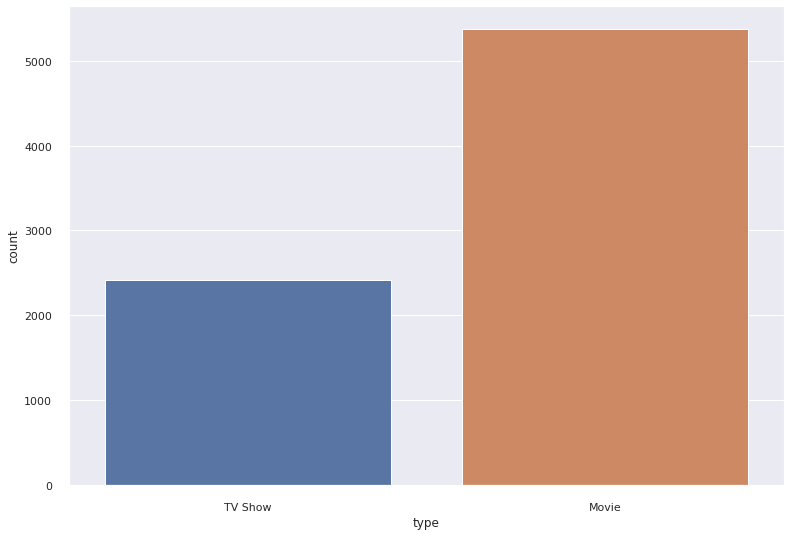

In [ ]:
# count plot for type column
sns.countplot(x = netflix_df['type'])

##### 1. Why did you pick the specific chart?

Bar charts are useful to compare different categorical or discrete variables. I used it in order to find which has more content TV show or movie.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see movies are more in number compared to TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 

Yes the company can focus on increasing TV-shows depending upon the current demand of web series

### Chart - 2: Top 10 directors with most number of movies

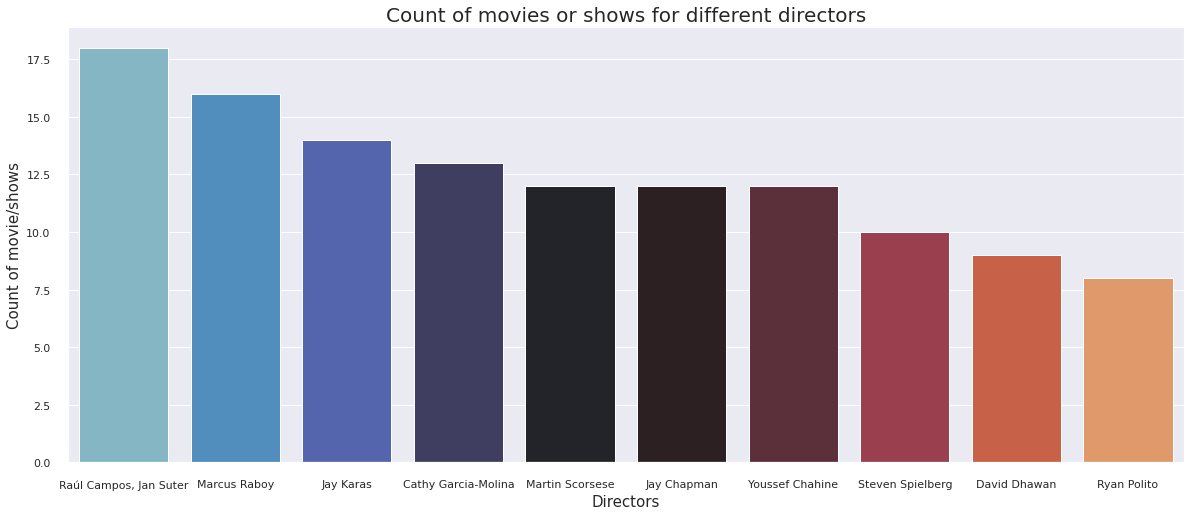

In [ ]:
# calling create_sns_plot function to plot bar graph
create_sns_plot(sns.barplot, 'director', 'frequency', year_count, 'icefire', 'Count of movies or shows for different directors', 'Directors', 'Count of movie/shows')

##### 1. Why did you pick the specific chart?

Bar charts are useful to compare different categorical or discrete variables. I used it in order to find out which directors has the most number of movies shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

As we can see:
* Raúl Campos, Jan Suter have directed the most number of movies followed by Marcus Raboy.
* Ryan Polito directed the least number of movies.
* Jay Chapman, Martin Scorsese and Youssef Chahine have directed the same amount of movies.



##### 3. Will the gained insights help creating a positive business impact? 


Yes if the content of that director is more popular company like Netflix can increase the movies or shows of that director.

### Chart - 3: Word cloud for listed_in column

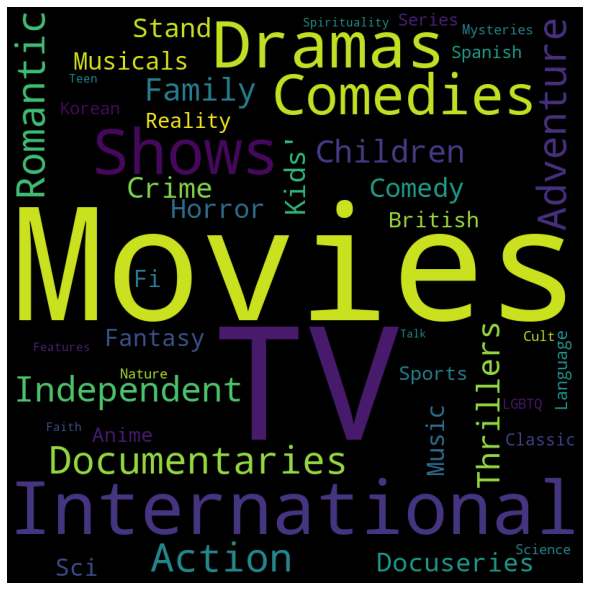

In [ ]:
create_word_cloud(netflix_df['listed_in'])

##### 1. Why did you pick the specific chart?

Word cloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them. 
<br> 
I used word cloud to find out the most popular genre on Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the above word cloud we can see some common genres like romantic, documentaries, dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact? 
Yes the above insights will have a positive impact on business because the genres which are more in demand, company can increase the content of that genres in future.

### Chart - 4: Top 10 actors that acted in most number of movies

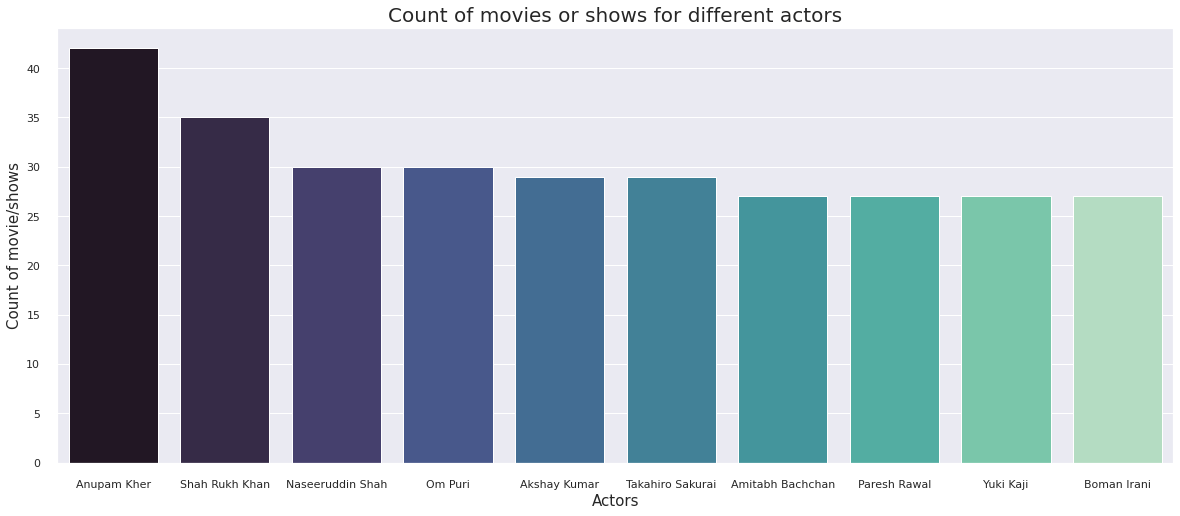

In [ ]:
# calling create_sns_plot function to plot bar graph
create_sns_plot(sns.barplot, 'actor_name', 'movie_count', actors_top_10, 'mako', 'Count of movies or shows for different actors', 'Actors', 'Count of movie/shows')

##### 1. Why did you pick the specific chart?

Bar charts are useful to compare different categorical or discrete variables. I used it in order to find out which actor has the most number of movies shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Inference:
* Anupam Kher has acted in the most number of films and TV shows.
* Count of movies is the same for Amitabh Bachchan, Yuki Kaji, Paresh Rawal and Boman Irani.


##### 3. Will the gained insights help creating a positive business impact? 


This analysis will help the company as they can increase the content of that particular actor to increase the viewership.

### Chart - 5

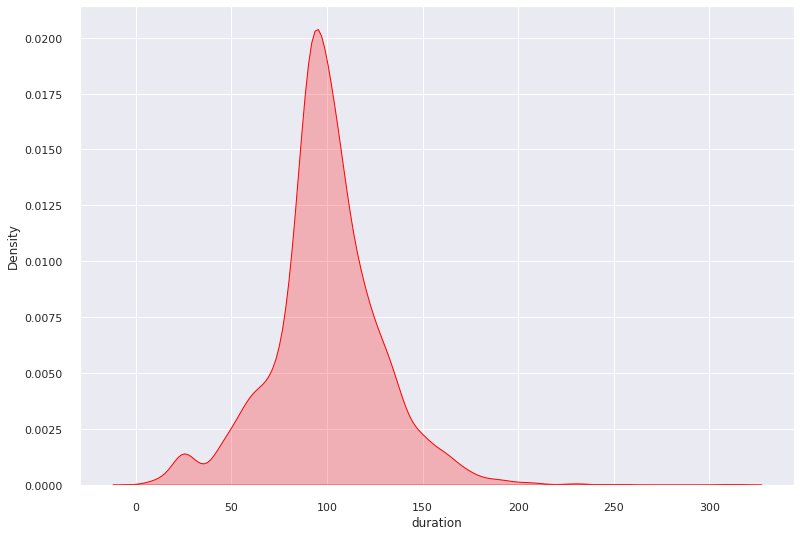

In [ ]:
# Chart - 8 visualization code
sns.kdeplot(data = netflix_movies_df['duration'], shade = True, color = 'red')

##### 1. Why did you pick the specific chart?

I used the distribution plot to find the length for majority of movies in minutes.

##### 2. What is/are the insight(s) found from the chart?

Inference: 
As we can see the duration of most of the movies is around 80 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact? 


By knowing if users prefer short or long films, the company can focus on increasing the movies of that particular duration.

### Chart - 6: Which rating has the most number of movies/tv shows on Netflix?





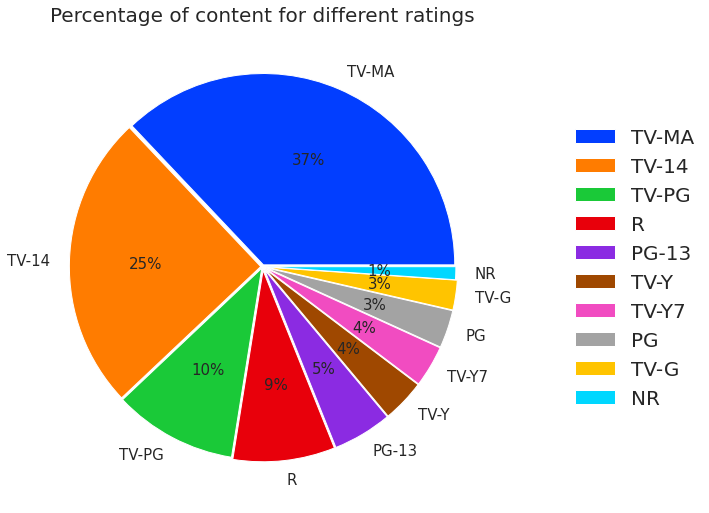

In [ ]:
# plotting the pie chart
graph = rating_count.plot.pie(
    y = 'frequency',
    labels = rating_count['rating'],
    colors = sns.color_palette('bright'),
    autopct = '%.0f%%',
    explode = [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01],
    fontsize = 15
)
graph.set_title('Percentage of content for different ratings', fontsize = 20)
graph.set_ylabel('')
plt.legend(bbox_to_anchor = (1,0.5), loc="center right", fontsize = 20, bbox_transform=plt.gcf().transFigure)

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. 
<br>
I used it to find which rating has the most number of movies/tv shows on Netflix

##### 2. What is/are the insight(s) found from the chart?

* We can clearly see from the pie plot that most of the content on Netflix is for **mature audiences**.
* Not rated content is the lowest on Netflix.


##### 3. Will the gained insights help creating a positive business impact? 


Yes, if the content for mature audiences is more and are in high demand, company can target to increase that rating content.

### Chart - 7

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

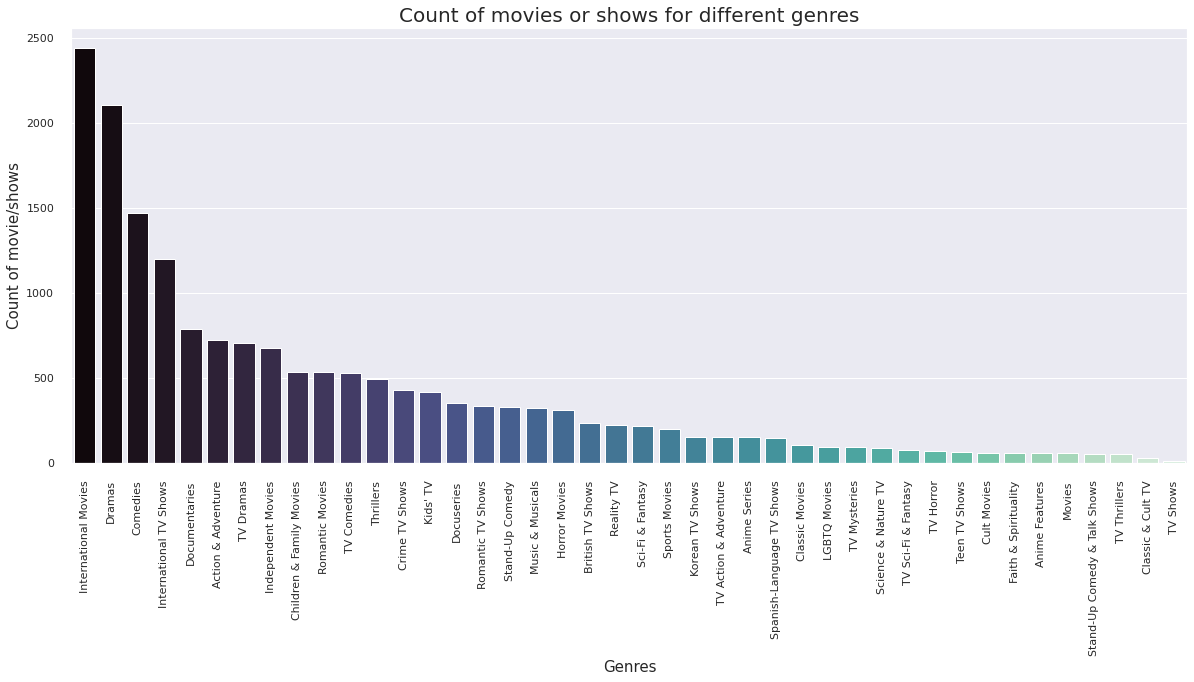

In [ ]:
# calling create_sns_plot function to plot bar graph
create_sns_plot(sns.barplot, 'Genres', "Count", genre_df, 'mako', 'Count of movies or shows for different genres', 'Genres', 'Count of movie/shows')
plt.xticks(rotation = 90)

##### 1. Why did you pick the specific chart?

Bar charts are useful to compare different categorical or discrete variables. I used it in order to find out which specific genre has the most number of movies shows on Netflix.


##### 2. What is/are the insight(s) found from the chart?


*   From the above chart we can see most of the content is for International movies, followed by Dramas and Comedies.
*   TV Shows are least in number on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 


Yes if the demand for comedy and drama movies or shows is high, company will try to fulfill that demand to increase their viewership.

### Chart - 8

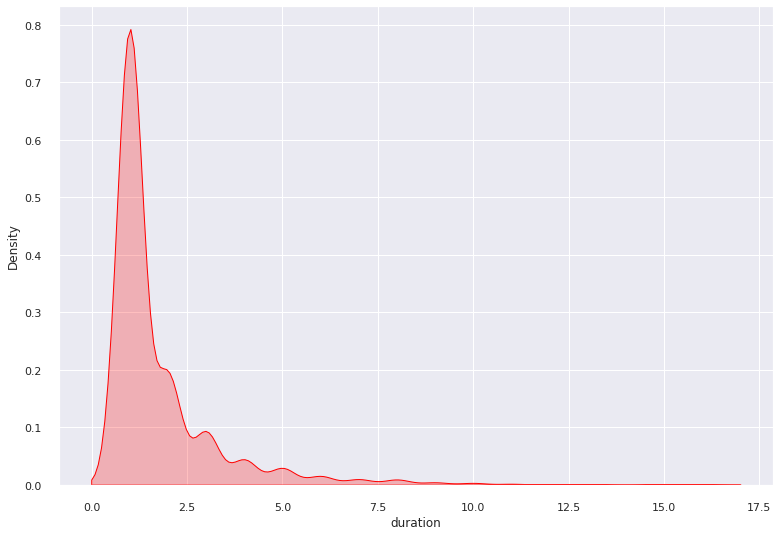

In [ ]:
# Chart - 9 visualization code
sns.kdeplot(data = netflix_tv_shows_df['duration'], shade = True, color = 'red')

##### 1. Why did you pick the specific chart?

I used the distribution plot to find the length for majority of TV shows on the basis of number of seasons.

##### 2. What is/are the insight(s) found from the chart?

From the above distribution plot we can see that most of the TV shows have around 1 to 2 seasons.

##### 3. Will the gained insights help creating a positive business impact? 


This will help the company to target different category of people that prefer short or long seasons.

### Chart - 9: Is Netflix has increasingly focusing on TV shows rather than movies in recent years?

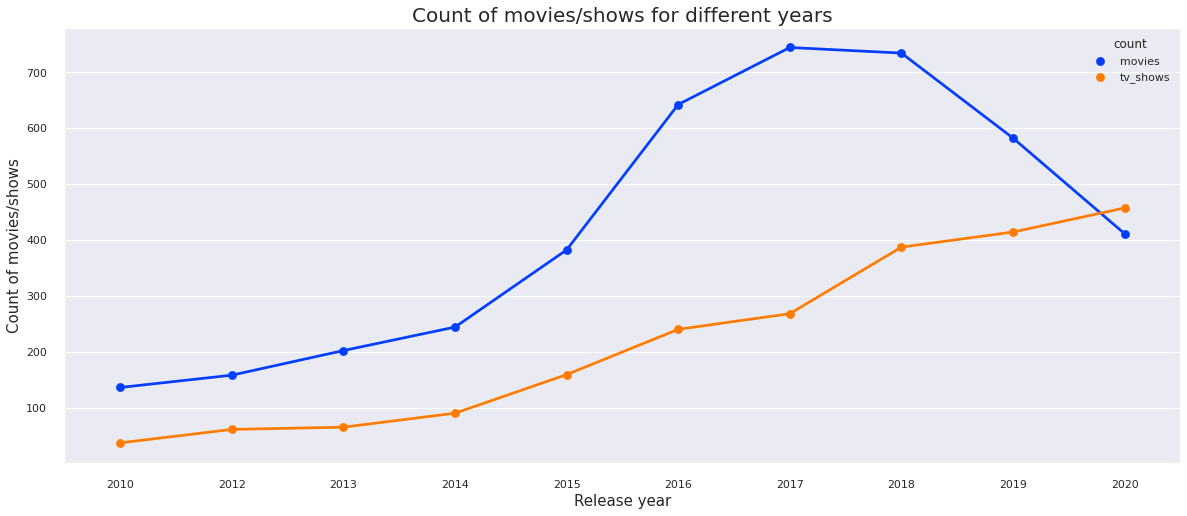

In [ ]:
# calling create_sns_plot function to plot line graph
create_sns_plot(sns.pointplot, 'release_year', 'vals', dfm, sns.color_palette('bright'), 'Count of movies/shows for different years', 'Release year', 'Count of movies/shows', 'count')

##### 1. Why did you pick the specific chart?

I pick the line graph to understand the trend for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

* Highest number of movies and tv shows were released in 2017 and 2020 respectively.
* With each year number of tv shows keeps on increasing.
* There is not much difference in the number of movies that were released in the years 2017 and 2018.
* In 2020 we see a dip in movies and an increase in tv shows due to Covid.


##### 3. Will the gained insights help creating a positive business impact? 


Yes as we can clearly see that Netflix has increasingly focusing on TV shows rather than movies in recent years.

### Chart - 10: Understanding what type(movie or tv shows) is available in different countries

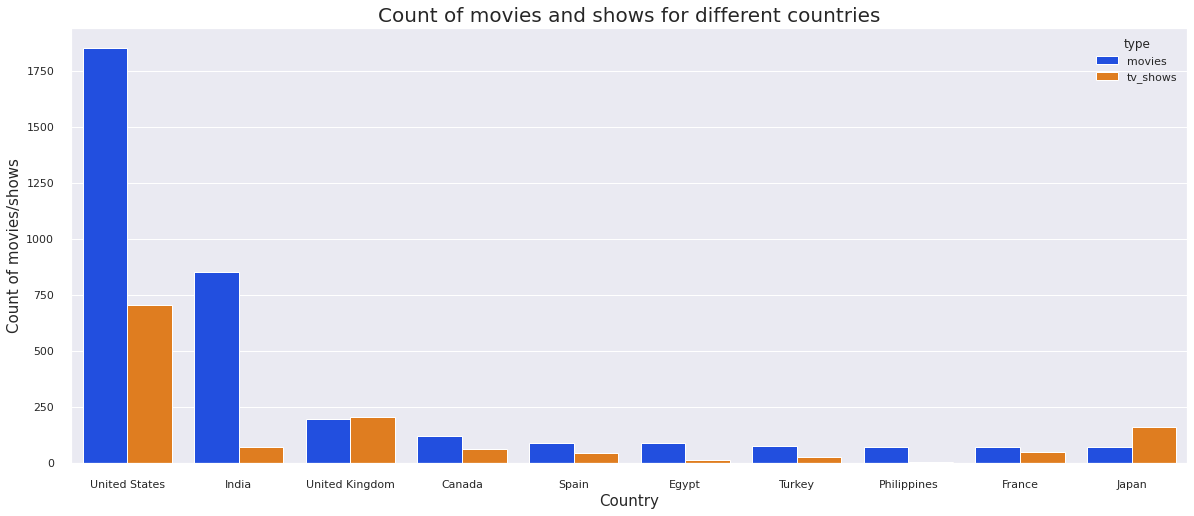

In [ ]:
# calling create_sns_plot function to plot double bar graph
create_sns_plot(sns.barplot, 'country', 'vals', dfm, sns.color_palette('bright'), 'Count of movies and shows for different countries', 'Country', 'Count of movies/shows', 'type')

##### 1. Why did you pick the specific chart?

A double bar graph is used to display two sets of data on the same graph. I wanted to compare movies with respect to TV shows for differnt countries.

##### 2. What is/are the insight(s) found from the chart?

* United States has produced the highest number of movies and shows.
* India is second in terms of movies produced.
* For the United Kingdom count of movies and tv shows are same.

##### 3. Will the gained insights help creating a positive business impact? 


As we can see the Indian movies are more in comparison to web series. For Japan TV shows are more in number. Company can target specific locations and increase the content  according to the region-wise demand. 

## ***5. Feature Engineering & Data Pre-processing***

### <b> Text Pre-processing </b>

In [ ]:
# filling the missing values with an empty string
netflix_df['director'] = netflix_df['director'].fillna('')
netflix_df['cast'] = netflix_df['cast'].fillna('')
netflix_df['country'] = netflix_df['country'].fillna('')
netflix_df['rating'] = netflix_df['rating'].fillna('')

In [ ]:
# selecting the columns for clustering
netflix_df['appended_text'] = netflix_df['description'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating'] + ' ' + netflix_df['listed_in']

In [ ]:
netflix_df['appended_text']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: appended_text, Length: 7787, dtype: object

### Removing punctuation

In [ ]:
# Writing a function which removes punctuation from our data
def remove_punc(text):
  no_punc = [char for char in text if char not in string.punctuation]
  return ''.join(no_punc)

In [ ]:
netflix_df['tokenized_text'] = netflix_df['appended_text'].apply(remove_punc)

In [ ]:
netflix_df[['appended_text', 'tokenized_text']].head()

,appended_text,tokenized_text
0,In a future where the elite inhabit an island ...,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow...",When an army recruit is found dead his fellow ...
3,"In a postapocalyptic world, rag-doll robots hi...",In a postapocalyptic world ragdoll robots hide...
4,A brilliant group of students become card-coun...,A brilliant group of students become cardcount...


### Removing stopwords

In [ ]:
# Writing a function which removes stopwords from our data
def remove_stopwords(text):
    no_stop_words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(no_stop_words)

In [ ]:
netflix_df['tokenized_text'] = netflix_df['tokenized_text'].apply(remove_stopwords)

In [ ]:
netflix_df[['appended_text', 'tokenized_text']].head()

,appended_text,tokenized_text
0,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,After a devastating earthquake hits Mexico Cit...,devastating earthquake hits Mexico City trappe...
2,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...
4,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...


### Stemming - 
Cropping words for space optimization. We will use SnowballStemmer for that.

In [ ]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Function for stemming each word of the given text
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

In [ ]:
netflix_df['tokenized_text'] = netflix_df['tokenized_text'].apply(stemming)

In [ ]:
netflix_df[['appended_text', 'tokenized_text']].head()

,appended_text,tokenized_text
0,In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...
1,After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...
2,"When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...
4,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...


###  Vectorization 

In [ ]:
# creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer(max_df = 0.9, min_df = 3)

In [ ]:
# applying tf idf to training and test data
X = tf_idf.fit_transform(netflix_df['tokenized_text']).toarray()

In [ ]:
print(len(tf_idf.get_feature_names()))

14032


### PCA for dimensionality reduction

Text(0.5, 1.0, 'The number of components needed to explain variance')

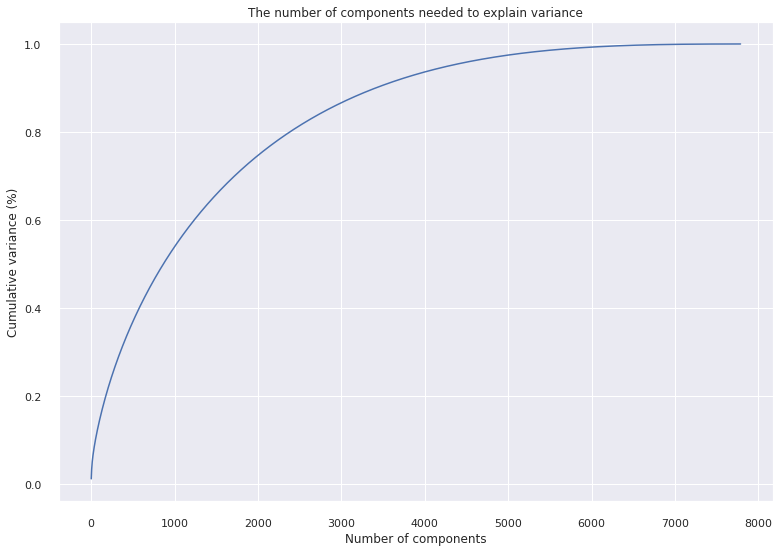

In [ ]:
# creating an object of PCA
pca = PCA()
# fitting pca on the vectorized data X
pca.fit(X)
# storing explained_variance_ratio_ in y
y = np.cumsum(pca.explained_variance_ratio_)
# plotting explained_variance_ratio_
plt.plot(y)
# setting ylabel
plt.ylabel('Cumulative variance (%)')
# setting xlabel
plt.xlabel('Number of components')
# setting title
plt.title('The number of components needed to explain variance')

#### In this case, to get the 95% of variance explained I need 5000 principal components.

In [ ]:
# taking 5000 n_components
pca = PCA(n_components = 5000)

# fitting pca on the vectorized data X
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (7787, 14032)
transformed shape: (7787, 5000)


In [ ]:
print(pca.explained_variance_)

[9.54750752e-03 4.82255384e-03 4.08246716e-03 ... 3.54357433e-05
 3.53002013e-05 3.52299399e-05]


## ***6. ML Model Implementation***

### Implementing hierarchical clustering

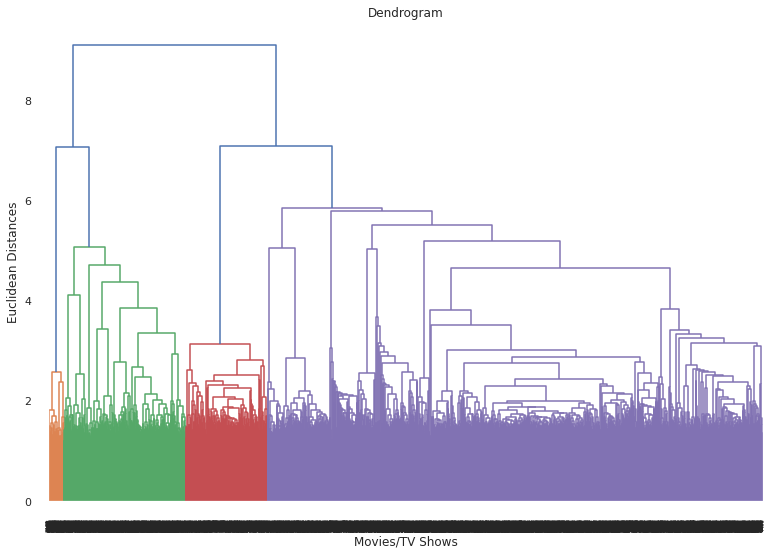

In [ ]:
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Movies/TV Shows')
plt.ylabel('Euclidean Distances')
plt.show()

#### Choosing the right number of clusters in Hierarchical Clustering

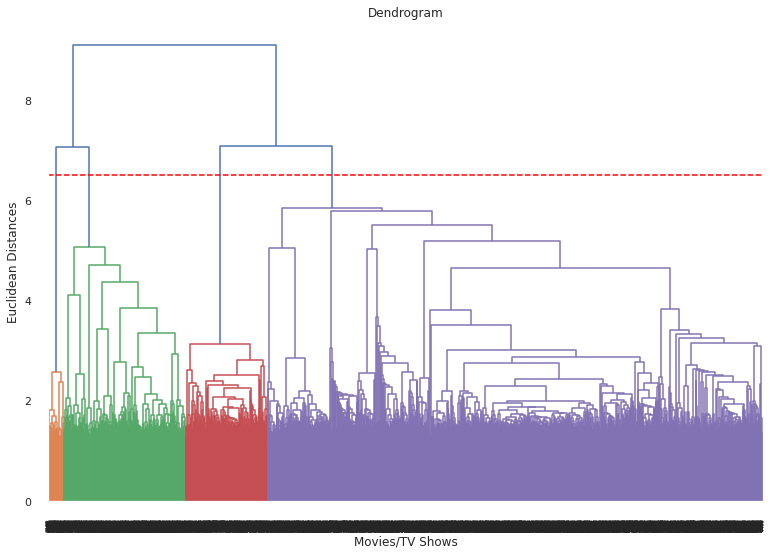

In [ ]:
# Finding largest vertical distance we can make without crossing any other horizontal line
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Movies/TV Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y = 6.5, color = 'red', linestyle='--')
plt.show()

#### The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

#### Here we see no. of clusters = 4

In [ ]:
# Fitting hierarchical clustering to the Netflix dataset
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

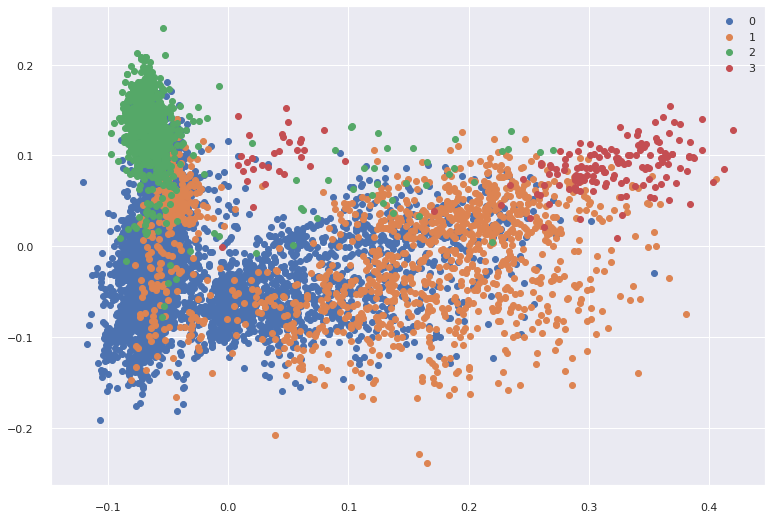

In [ ]:
# Getting unique labels
unique_labels = np.unique(y_hc)

# plotting the clusters
for unique_label in unique_labels:
    plt.scatter(X_pca[y_hc == unique_label, 0], X_pca[y_hc == unique_label, 1], label = unique_label)
plt.legend()

<br>

### **Implementing K-Means Clustering**

Text(0, 0.5, 'Sum of the squared distance')

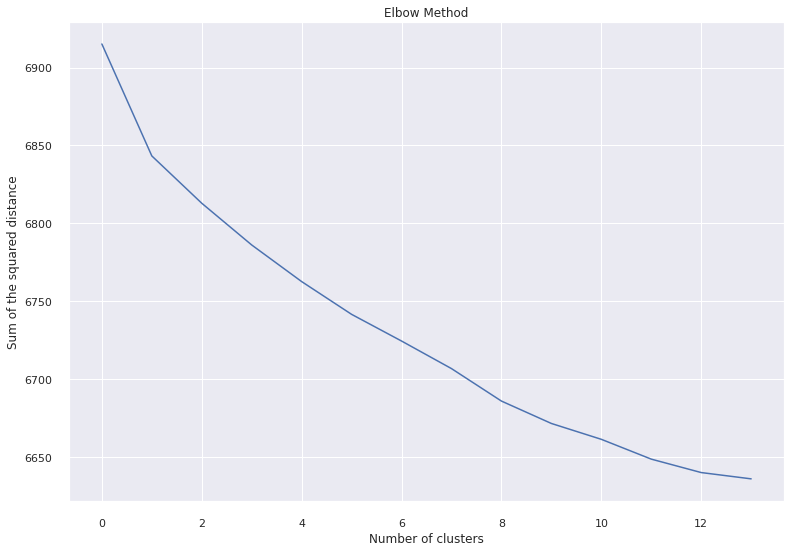

In [ ]:
### Plotting the elbow-curve

# initializing the array for sum of the squared distance
ssd = []

# running loop till 15 to get inertia values
for num_of_clusters in range(1, 15):
    kmeans = KMeans(n_clusters = num_of_clusters, random_state = 42)
    # fit the data to KMeans
    kmeans.fit(X_pca)
    # adding inertia value to the ssd list
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each num_of_clusters
sns.set()
plt.plot(ssd)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of the squared distance')

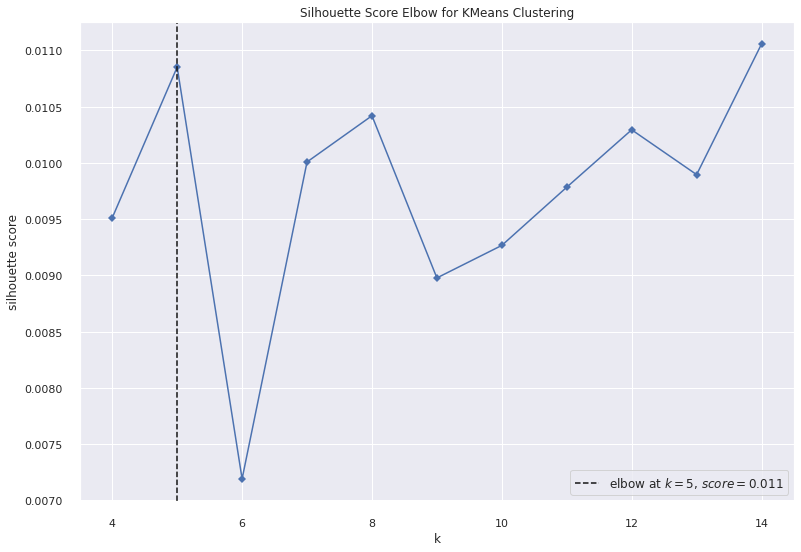

In [ ]:
### Sample code to run the KElbowVisualizer

# creating an object of KMeans and KElbowVisualizer
kmeans = KMeans(random_state = 42)
visualizer = KElbowVisualizer(kmeans, k = (4, 15), metric = 'silhouette', timings = False)

# Fit the data to the visualizer
visualizer.fit(X_pca)
# Finalize and render the figure
visualizer.show()

Inference:<br>
As we can see from both the plots, the value of k as 5 gives the optimal result.

# Model Evaluation:
#### Here we will use Silhouette score as it is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.



 Silhouette Score: 0.008143993182040942


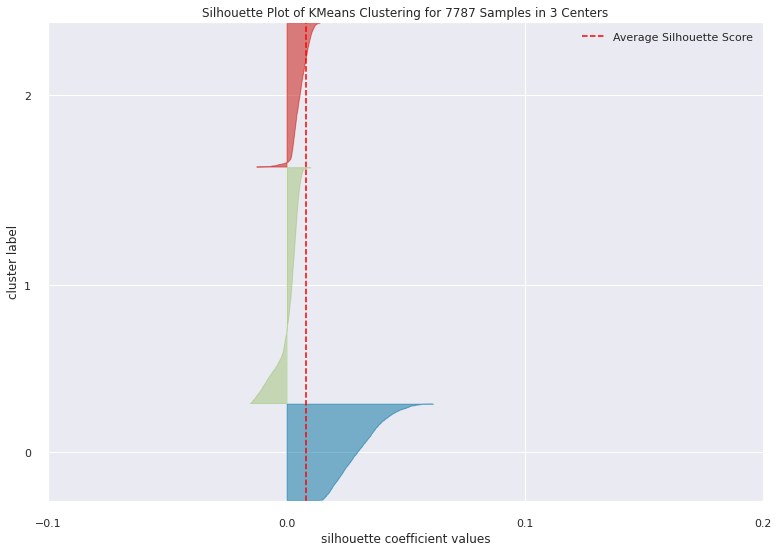



 Silhouette Score: 0.009498085447123496


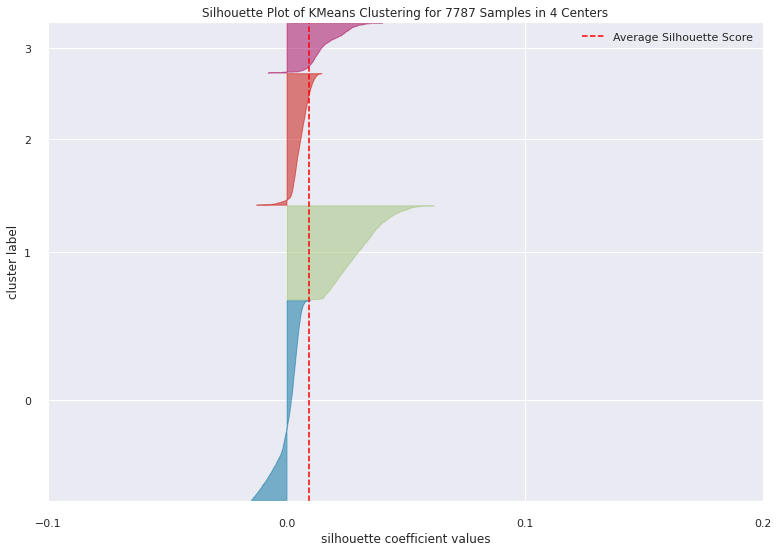



 Silhouette Score: 0.010121330129081304


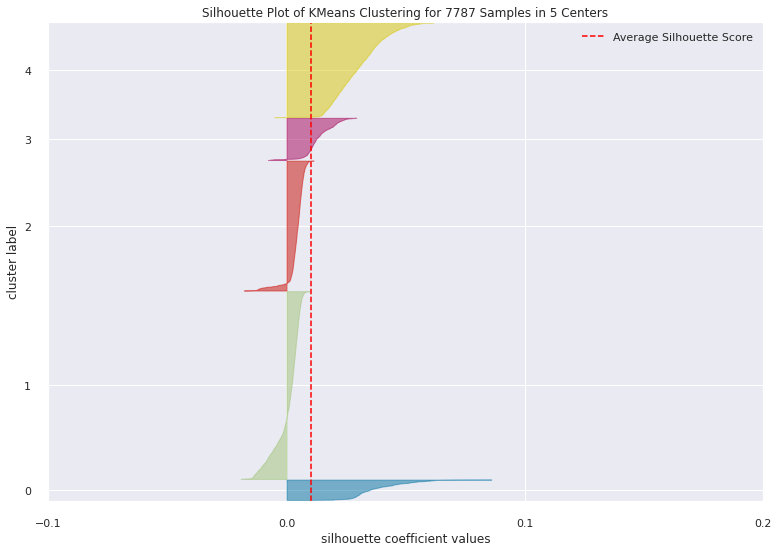



 Silhouette Score: 0.007246268273216074


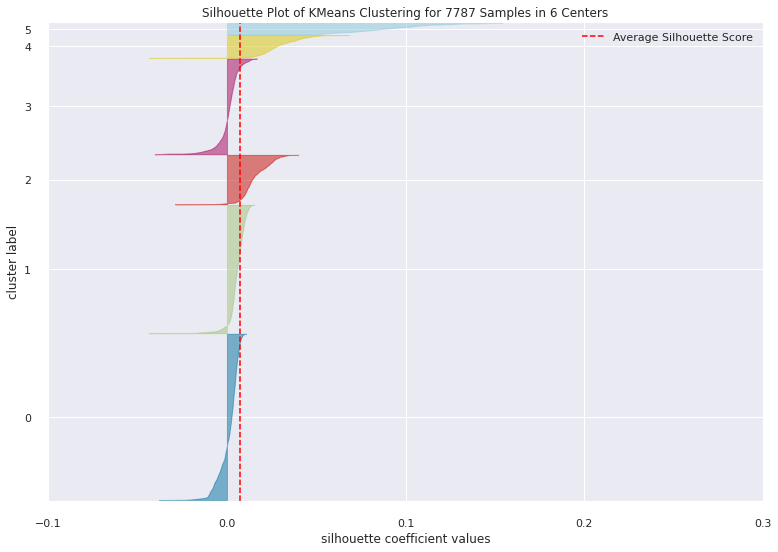

In [ ]:
# Forming clusters to get the best Silhouette score
for i in range(3, 7):
    kmeans = KMeans(i, random_state = 42)
    # Instantiate the clustering model and visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(X_pca)
    # Printing the silhouette score
    print(f"\n\n Silhouette Score: {silhouette_score(X_pca, kmeans.labels_)}")
    # Finalize and render the figure
    visualizer.show()

### Inference: <br>
##### We have formed different clusters to find the optimal value of k. From the above graphs, we get the best silhouette score when 5 clusters were formed. So we will take k = 5.

### Setting the value of K as 5

In [ ]:
# fitting the k means algorithm by setting no of clusters as 5
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

<br>

### Using word cloud to give names to these clusters

In [ ]:
# kmeans label to cluster column
netflix_df['cluster_number'] = kmeans.labels_

<br>

#### Cluster 0: Family movies - Comedy and Drama

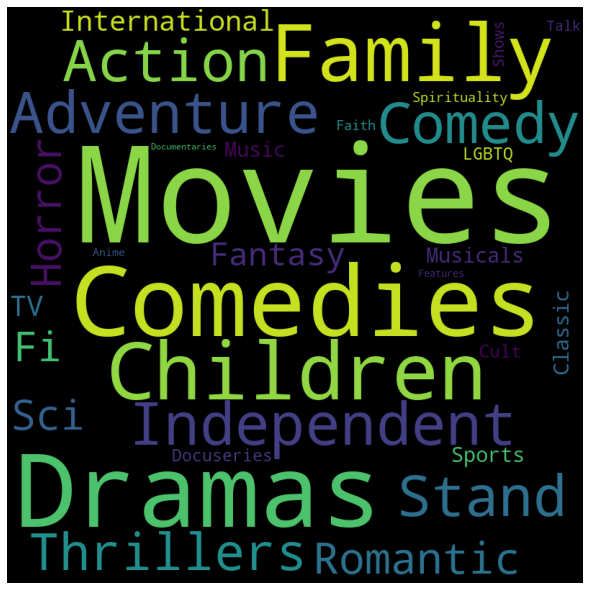

In [ ]:
# calling function to show word cloud for cluster 0
create_word_cloud(netflix_df[netflix_df['cluster_number'] == 0]['listed_in'])

<br>

#### Cluster 1: Documentaries and sports movies

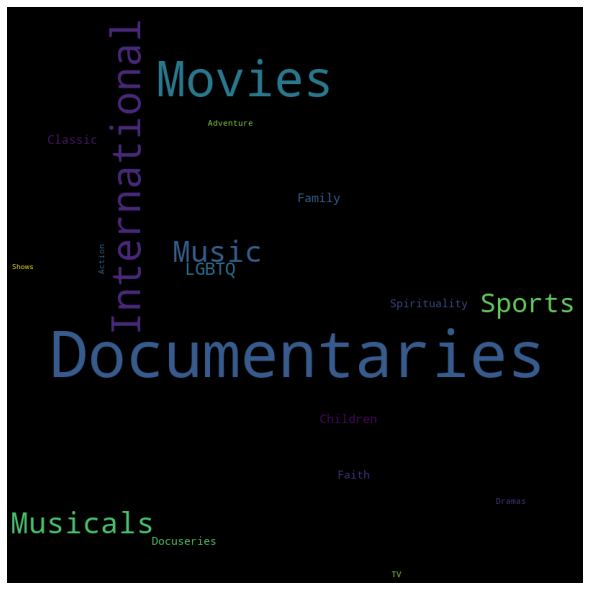

In [ ]:
# calling function to show word cloud for cluster 1
create_word_cloud(netflix_df[netflix_df['cluster_number'] == 1]['listed_in'])

<br>

#### Cluster 2: International TV Shows - Crime, Drama and Romantic

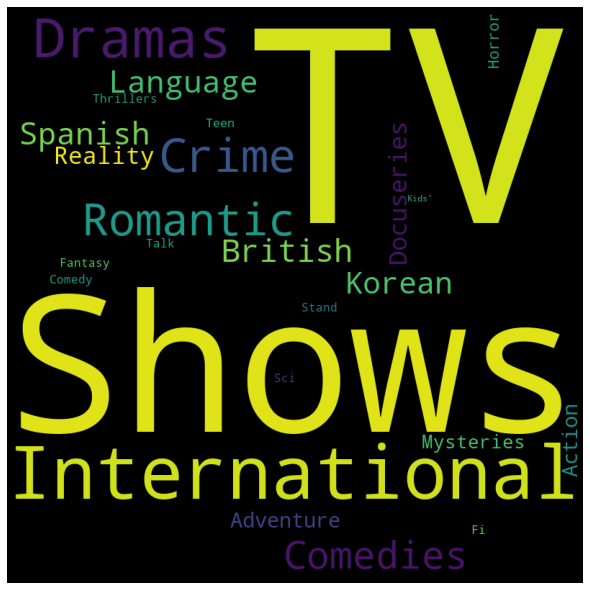

In [ ]:
# calling function to show word cloud for cluster 2
create_word_cloud(netflix_df[netflix_df['cluster_number'] == 2]['listed_in'])

<br>

#### Cluster 3: International Movies - Adventure, Comedy and Drama

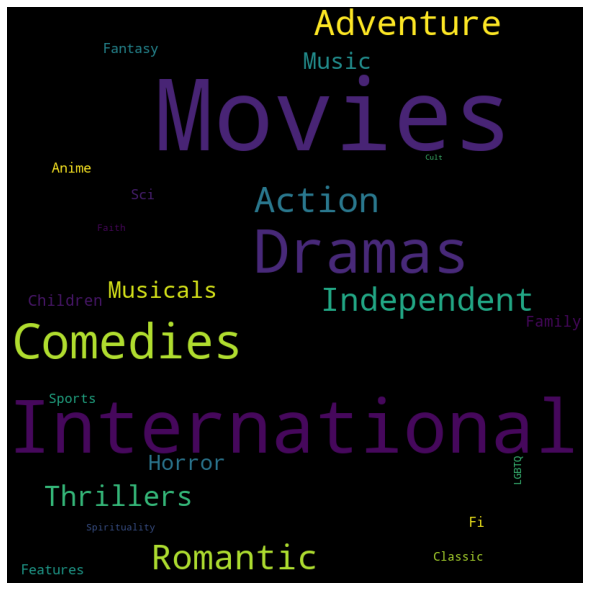

In [ ]:
# calling function to show word cloud for cluster 3
create_word_cloud(netflix_df[netflix_df['cluster_number'] == 3]['listed_in'])

<br>

#### Cluster 4: Kids TV Shows - Animation

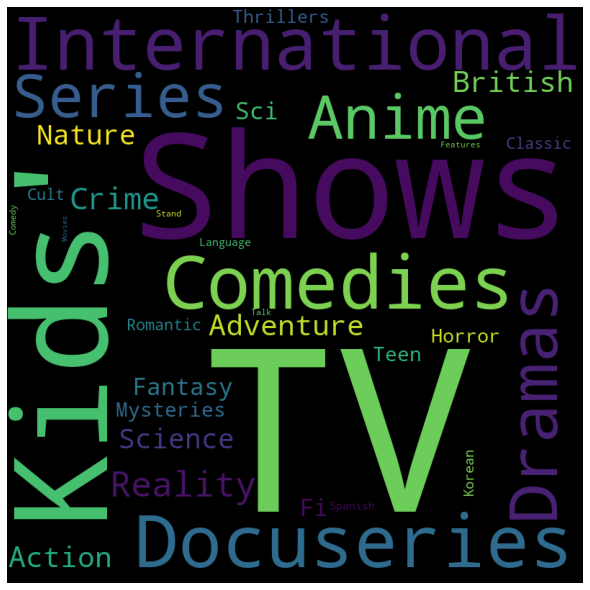

In [ ]:
# calling function to show word cloud for cluster 4
create_word_cloud(netflix_df[netflix_df['cluster_number'] == 4]['listed_in'])

<br>

### Visualisation of Clusters

In [ ]:
# predicting the labels of clusters
y_kmeans = kmeans.fit_predict(X_pca)

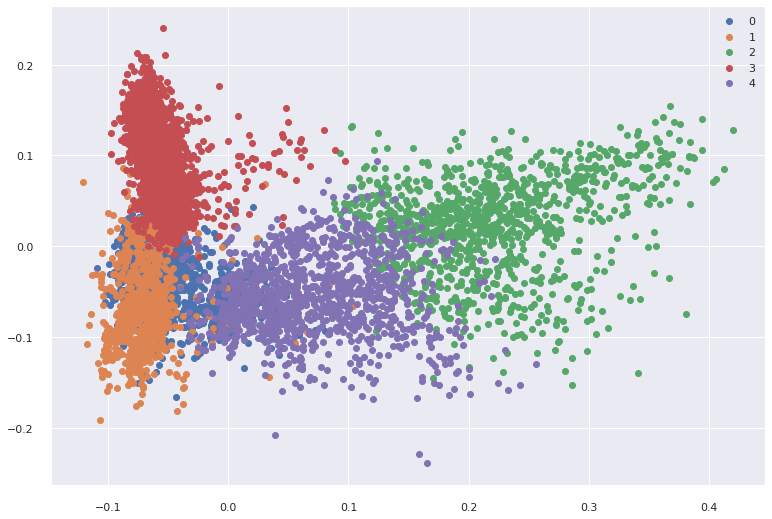

In [ ]:
# Getting unique labels
unique_labels = np.unique(y_kmeans)
 
# plotting the clusters
for unique_label in unique_labels:
    plt.scatter(X_pca[y_kmeans == unique_label, 0], X_pca[y_kmeans == unique_label, 1], label = unique_label)
plt.legend()

#### **Clusters:**
* ##### Cluster 0: Family movies
* ##### Cluster 1: Documentaries and sports movies
* ##### Cluster 2: International TV Shows
* ##### Cluster 3: International Movies
* ##### Cluster 4: Kids' TV Shows

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*   #### Most of the content available on Netflix is for mature audiences which shows the demand for kids’ content is low.

*   #### In recent years, Netflix has increasingly focused on TV shows rather than movies.

*   #### Most movies/TV shows available on Netflix were directed by Raúl Campos and Jan Suter.

*   #### Based on the content available on Netflix, the United States has produced the highest number of movies and TV shows.

*   #### Most movies’ duration is around 80 to 120 minutes whereas the duration for TV shows is around 1 to 2 seasons.

*   #### Japan has more TV shows than movies on Netflix.

*   #### Anupam Kher has acted in most of the movies and shows present on Netflix.

*   #### Hierarchical clustering formed 4 clusters whereas K-means formed 5 clusters.

*   #### We get the optimal value of k at 5 using the elbow method and Silhouette score.

*   #### Content is divided into 5 clusters: Family movies, Documentaries, International TV Shows, International movies and Kids’ TV shows.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***